In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
nba_hurt = pd.read_csv('nba_hurt2.csv')
nba_hurt.head()
nba_hurt = nba_hurt.drop([0], axis = 0)
nba_hurt.dropna(how = "any")

,Unnamed: 0,Date,Team,name,Notes,year_start,year_end,position,height,weight,birth_date,college,Strains/Sprains,Dislocations,Arm Fractures,Leg Fractures,Injury Type,Estimated Medical Costs (2012)
1,0,2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out inde...,2003.0,2015.0,F-C,9-Jun,258.0,1981-11-20,Duke University,False,False,True,False,Arm Fracture,7666
2,1,2010-10-08,Blazers,Jeff Ayres,torn ACL in right knee (out indefinitely),2010.0,2016.0,F,9-Jun,240.0,1987-04-29,Arizona State University,False,False,False,False,No Index,No Index
3,2,2010-10-08,Nets,Troy Murphy,strained lower back (out indefinitely),2002.0,2013.0,F-C,11-Jun,245.0,1980-05-02,University of Notre Dame,True,False,False,False,Strain/Sprain,3175
4,3,2010-10-12,Bucks,Darington Hobson,surgery on left hip (out for season),2012.0,2012.0,G,7-Jun,210.0,1987-09-29,University of New Mexico,False,False,False,False,No Index,No Index
5,4,2010-10-12,Kings,Samuel Dalembert,strained left groin (out indefinitely),2002.0,2015.0,C,11-Jun,255.0,1981-05-10,Seton Hall University,True,False,False,False,Strain/Sprain,3175
6,5,2010-10-17,Bobcats,Dominic McGuire,stress fracture in left shin (out indefinitely),2008.0,2013.0,F,9-Jun,220.0,1985-10-20,"California State University, Fresno",False,False,False,False,No Index,No Index
7,6,2010-10-18,Warriors,Lou Amundson,surgery to repair fractured right index finger...,2007.0,2016.0,F,9-Jun,220.0,1982-12-07,"University of Nevada, Las Vegas",False,False,True,False,Arm Fracture,7666
8,7,2010-10-19,Suns,Josh Childress,fractured right index finger (out indefinitely),2005.0,2014.0,G-F,8-Jun,210.0,1983-06-20,Stanford University,False,False,True,False,Arm Fracture,7666
9,8,2010-10-22,Heat,Mike Miller,surgery on right hand to repair a broken thumb...,2001.0,2017.0,F-G,8-Jun,218.0,1980-02-19,University of Florida,False,False,False,False,No Index,No Index
10,9,2010-10-25,Thunder,Nick Collison,left knee injury (out indefinitely),2005.0,2018.0,F,10-Jun,255.0,1980-10-26,University of Kansas,False,False,False,False,No Index,No Index


In [4]:
age = nba_hurt["birth_date"].str.split("-", n = 2, expand = True)
date= nba_hurt["Date"].str.split('-', n = 2, expand = True)

,0,1,2
1,1981.0,11,20
2,1987.0,04,29
3,1980.0,05,02
4,1987.0,09,29
5,1981.0,05,10
6,1985.0,10,20
7,1982.0,12,07
8,1983.0,06,20
9,1980.0,02,19
10,1980.0,10,26


In [17]:
#age = age.loc[age[2] - 2019]
date2 = date.iloc[0:12431,0]
age2 = age.iloc[0:12431,0]

In [19]:
nba_hurt["Injury Age"] = date2 - age2
nba_hurt

,Unnamed: 0,Date,Team,name,Notes,year_start,year_end,position,height,weight,birth_date,college,Strains/Sprains,Dislocations,Arm Fractures,Leg Fractures,Injury Type,Estimated Medical Costs (2012),Injury Age
1,0,2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out inde...,2003.0,2015.0,F-C,9-Jun,258.0,1981-11-20,Duke University,False,False,True,False,Arm Fracture,7666,29.0
2,1,2010-10-08,Blazers,Jeff Ayres,torn ACL in right knee (out indefinitely),2010.0,2016.0,F,9-Jun,240.0,1987-04-29,Arizona State University,False,False,False,False,No Index,No Index,23.0
3,2,2010-10-08,Nets,Troy Murphy,strained lower back (out indefinitely),2002.0,2013.0,F-C,11-Jun,245.0,1980-05-02,University of Notre Dame,True,False,False,False,Strain/Sprain,3175,30.0
4,3,2010-10-12,Bucks,Darington Hobson,surgery on left hip (out for season),2012.0,2012.0,G,7-Jun,210.0,1987-09-29,University of New Mexico,False,False,False,False,No Index,No Index,23.0
5,4,2010-10-12,Kings,Samuel Dalembert,strained left groin (out indefinitely),2002.0,2015.0,C,11-Jun,255.0,1981-05-10,Seton Hall University,True,False,False,False,Strain/Sprain,3175,29.0
6,5,2010-10-17,Bobcats,Dominic McGuire,stress fracture in left shin (out indefinitely),2008.0,2013.0,F,9-Jun,220.0,1985-10-20,"California State University, Fresno",False,False,False,False,No Index,No Index,25.0
7,6,2010-10-18,Warriors,Lou Amundson,surgery to repair fractured right index finger...,2007.0,2016.0,F,9-Jun,220.0,1982-12-07,"University of Nevada, Las Vegas",False,False,True,False,Arm Fracture,7666,28.0
8,7,2010-10-19,Suns,Josh Childress,fractured right index finger (out indefinitely),2005.0,2014.0,G-F,8-Jun,210.0,1983-06-20,Stanford University,False,False,True,False,Arm Fracture,7666,27.0
9,8,2010-10-22,Heat,Mike Miller,surgery on right hand to repair a broken thumb...,2001.0,2017.0,F-G,8-Jun,218.0,1980-02-19,University of Florida,False,False,False,False,No Index,No Index,30.0
10,9,2010-10-25,Thunder,Nick Collison,left knee injury (out indefinitely),2005.0,2018.0,F,10-Jun,255.0,1980-10-26,University of Kansas,False,False,False,False,No Index,No Index,30.0


age2 

## 

In [22]:

age_bins = [0, 20.90, 24.90, 29.90, 34.90, 39.90, 44.90, 49.90, 99999]
group_names = ["<21", "21-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50+"]

nba_hurt["Age Group"] = pd.cut(nba_hurt["Injury Age"], age_bins, labels =group_names)

nba_hurt

,Unnamed: 0,Date,Team,name,Notes,year_start,year_end,position,height,weight,birth_date,college,Strains/Sprains,Dislocations,Arm Fractures,Leg Fractures,Injury Type,Estimated Medical Costs (2012),Injury Age,Age Group
1,0,2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out inde...,2003.0,2015.0,F-C,9-Jun,258.0,1981-11-20,Duke University,False,False,True,False,Arm Fracture,7666,29.0,25-29
2,1,2010-10-08,Blazers,Jeff Ayres,torn ACL in right knee (out indefinitely),2010.0,2016.0,F,9-Jun,240.0,1987-04-29,Arizona State University,False,False,False,False,No Index,No Index,23.0,21-24
3,2,2010-10-08,Nets,Troy Murphy,strained lower back (out indefinitely),2002.0,2013.0,F-C,11-Jun,245.0,1980-05-02,University of Notre Dame,True,False,False,False,Strain/Sprain,3175,30.0,30-34
4,3,2010-10-12,Bucks,Darington Hobson,surgery on left hip (out for season),2012.0,2012.0,G,7-Jun,210.0,1987-09-29,University of New Mexico,False,False,False,False,No Index,No Index,23.0,21-24
5,4,2010-10-12,Kings,Samuel Dalembert,strained left groin (out indefinitely),2002.0,2015.0,C,11-Jun,255.0,1981-05-10,Seton Hall University,True,False,False,False,Strain/Sprain,3175,29.0,25-29
6,5,2010-10-17,Bobcats,Dominic McGuire,stress fracture in left shin (out indefinitely),2008.0,2013.0,F,9-Jun,220.0,1985-10-20,"California State University, Fresno",False,False,False,False,No Index,No Index,25.0,25-29
7,6,2010-10-18,Warriors,Lou Amundson,surgery to repair fractured right index finger...,2007.0,2016.0,F,9-Jun,220.0,1982-12-07,"University of Nevada, Las Vegas",False,False,True,False,Arm Fracture,7666,28.0,25-29
8,7,2010-10-19,Suns,Josh Childress,fractured right index finger (out indefinitely),2005.0,2014.0,G-F,8-Jun,210.0,1983-06-20,Stanford University,False,False,True,False,Arm Fracture,7666,27.0,25-29
9,8,2010-10-22,Heat,Mike Miller,surgery on right hand to repair a broken thumb...,2001.0,2017.0,F-G,8-Jun,218.0,1980-02-19,University of Florida,False,False,False,False,No Index,No Index,30.0,30-34
10,9,2010-10-25,Thunder,Nick Collison,left knee injury (out indefinitely),2005.0,2018.0,F,10-Jun,255.0,1980-10-26,University of Kansas,False,False,False,False,No Index,No Index,30.0,30-34


In [27]:
inj_age_df = nba_hurt.groupby(["Age Group"])
inj_age_count = inj_age_df["Age Group"].count()
inj_age_count

Age Group
<21       260
21-24    2800
25-29    5546
30-34    2876
35-39     754
40-44      90
45-49      24
50+        80
Name: Age Group, dtype: int64

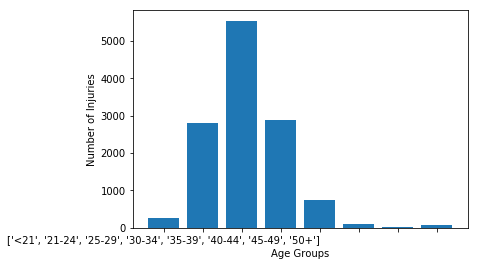

In [36]:
x_axis = np.arange(len(group_names))
plt.bar(x_axis,inj_age_count, label="Age Groups", align = "center")
 

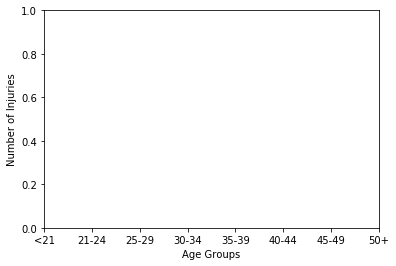

In [39]:
plt.xticks(x_axis,["<21", "21-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50+"])
plt.xlabel("Age Groups")
plt.ylabel("Number of Injuries")
plt.savefig("Injuries_Age.png")